Завдання 1

Створіть клас Editor, який містить методи view_document та edit_document. Нехай метод edit_document виводить на екран інформацію про те, що редагування документів недоступне для безкоштовної версії. Створіть підклас ProEditor, у якому цей метод буде перевизначено. Введіть ліцензійний ключ із клавіатури і, якщо він коректний, створіть екземпляр класу ProEditor, інакше Editor. Викликайте методи перегляду та редагування документів.



In [1]:
class Editor:
    def view_document(self):
        print("Перегляд документа доступний.")

    def edit_document(self):
        print("Редагування недоступне для безкоштовної версії.")


class ProEditor(Editor):
    def edit_document(self):
        print("Документ відредаговано успішно. Pro-версія активована.")


def main():
    correct_key = "PRO123"

    user_key = input("Будь ласка, введіть ваш ліцензійний ключ: ")

    if user_key == correct_key:
        print("Ключ вірний. Запускається Pro-версія.")
        editor_instance = ProEditor()
    else:
        print("Невірний або відсутній ключ. Запускається безкоштовна версія.")
        editor_instance = Editor()

    editor_instance.view_document()
    editor_instance.edit_document()


if __name__ == "__main__":
    main()

Будь ласка, введіть ваш ліцензійний ключ: PRO123
Ключ вірний. Запускається Pro-версія.
Перегляд документа доступний.
Документ відредаговано успішно. Pro-версія активована.


Завдання 2

Опишіть класи графічного об'єкта, прямокутника та об'єкта, який може обробляти натискання миші. Опишіть клас кнопки. Створіть об'єкт кнопки та звичайного прямокутника. Викличте метод натискання на кнопку.



In [3]:
class GraphicalObject:
    def draw(self):
        print("Малювання графічного об'єкта.")


class Clickable:
    def on_click(self):
        print("Об'єкт отримав натискання миші.")


class Rectangle(GraphicalObject):
    def draw(self):
        print("Малювання прямокутника.")


class Button(Rectangle, Clickable):
    def __init__(self, text="Button"):
        self.text = text

    def draw(self):
        print(f"Малювання кнопки з текстом '{self.text}'.")


def main():
    simple_rect = Rectangle()
    my_button = Button(text="Натисни мене")

    print("Дії зі звичайним прямокутником:")
    simple_rect.draw()

    print("\nДії з кнопкою:")
    my_button.draw()
    my_button.on_click()


if __name__ == "__main__":
    main()

Дії зі звичайним прямокутником:
Малювання прямокутника.

Дії з кнопкою:
Малювання кнопки з текстом 'Натисни мене'.
Об'єкт отримав натискання миші.


Завдання 3

Створіть ієрархію класів із використанням множинного успадкування. Виведіть на екран порядок вирішення методів для кожного класу. Поясніть, чому лінеаризація даних класів виглядає саме так.


In [4]:
class A:
    def info(self):
        print("Клас A")


class B(A):
    def info(self):
        print("Клас B")
        super().info()


class C(A):
    def info(self):
        print("Клас C")
        super().info()


class D(B, C):
    def info(self):
        print("Клас D")
        super().info()


def main():
    print("MRO для класу D:")
    print(D.mro())

    print("\nВиклик методу для об'єкта класу D:")
    d_instance = D()
    d_instance.info()


if __name__ == "__main__":
    main()

MRO для класу D:
[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]

Виклик методу для об'єкта класу D:
Клас D
Клас B
Клас C
Клас A



Завдання 4

Створіть UML-діаграми до завдань 1, 3 та 7. Збережіть їх у форматі *.uml.
см. ниже


Завдання 5

Використовуючи код example_10, створіть декоратор @staticmethod для визначення повноліття людини в Україні та Америки.


In [6]:
from datetime import date


class Person:
    def __init__(self, surname, name, age):
        self.surname = surname
        self.name = name
        self.age = age

    @classmethod
    def from_birth_year(cls, surname, name, birth_year):
        return cls(surname, name, date.today().year - birth_year)

    def print_info(self):
        print(f"{self.surname} {self.name}'s age is: {self.age}")

    @staticmethod
    def is_adult_ukraine(age):
        return age >= 18

    @staticmethod
    def is_adult_usa(age):
        return age >= 21


def main():
    person_age_17 = 17
    person_age_20 = 20

    print(f"Вік {person_age_17} є повнолітнім в Україні: "
          f"{Person.is_adult_ukraine(person_age_17)}")

    print(f"Вік {person_age_20} є повнолітнім в Україні: "
          f"{Person.is_adult_ukraine(person_age_20)}")

    print("-" * 20)

    print(f"Вік {person_age_17} є повнолітнім в США: "
          f"{Person.is_adult_usa(person_age_17)}")

    print(f"Вік {person_age_20} є повнолітнім в США: "
          f"{Person.is_adult_usa(person_age_20)}")


if __name__ == "__main__":
    main()

Вік 17 є повнолітнім в Україні: False
Вік 20 є повнолітнім в Україні: True
--------------------
Вік 17 є повнолітнім в США: False
Вік 20 є повнолітнім в США: False



Завдання 6

Використовуючи код example_10, створіть декоратори @classmethod для формування переліку об'єктів, які підрахують кількість повнолітніх людей в Україні та Америці.


In [8]:
from datetime import date


class Person:
    all_people = []

    def __init__(self, surname, name, age):
        self.surname = surname
        self.name = name
        self.age = age
        Person.all_people.append(self)

    @classmethod
    def from_birth_year(cls, surname, name, birth_year):
        age = date.today().year - birth_year
        return cls(surname, name, age)

    def print_info(self):
        print(f"{self.surname} {self.name}'s age is: {self.age}")

    @classmethod
    def count_adults_ukraine(cls):
        return sum(1 for person in cls.all_people if person.age >= 18)

    @classmethod
    def count_adults_usa(cls):
        return sum(1 for person in cls.all_people if person.age >= 21)


def main():
    person1 = Person('Іваненко', 'Іван', 17)
    person2 = Person.from_birth_year('Довженко', 'Богдан', 2005)
    person3 = Person.from_birth_year('Сидорчук', 'Петро', 1999)
    person4 = Person('Макущенко', 'Дмитро', 21)

    print(f"Загальна кількість людей: {len(Person.all_people)}")

    adults_in_ua = Person.count_adults_ukraine()
    print(f"Кількість повнолітніх в Україні (18+): {adults_in_ua}")

    adults_in_us = Person.count_adults_usa()
    print(f"Кількість повнолітніх в США (21+): {adults_in_us}")


if __name__ == "__main__":
    main()

Загальна кількість людей: 4
Кількість повнолітніх в Україні (18+): 3
Кількість повнолітніх в США (21+): 2



Завдання 7

Створіть ієрархію класів транспортних засобів. У загальному класі опишіть загальні всім транспортних засобів поля, у спадкоємцях – специфічні їм. Створіть кілька екземплярів. Виведіть інформацію щодо кожного транспортного засобу.

In [5]:
class Vehicle:
    def __init__(self, brand, model, year):
        self.brand = brand
        self.model = model
        self.year = year

    def display_info(self):
        print(f"Тип: Загальний транспортний засіб")
        print(f"Бренд: {self.brand}, Модель: {self.model}, Рік: {self.year}")


class Car(Vehicle):
    def __init__(self, brand, model, year, num_doors, engine_volume):
        super().__init__(brand, model, year)
        self.num_doors = num_doors
        self.engine_volume = engine_volume

    def display_info(self):
        print(f"Тип: Автомобіль")
        super().display_info()
        print(f"Кількість дверей: {self.num_doors}, Об'єм двигуна: {self.engine_volume} л")


class Boat(Vehicle):
    def __init__(self, brand, model, year, displacement_tons):
        super().__init__(brand, model, year)
        self.displacement_tons = displacement_tons

    def display_info(self):
        print(f"Тип: Човен")
        super().display_info()
        print(f"Водотоннажність: {self.displacement_tons} тонн")


class Airplane(Vehicle):
    def __init__(self, brand, model, year, max_altitude_ft, num_engines):
        super().__init__(brand, model, year)
        self.max_altitude_ft = max_altitude_ft
        self.num_engines = num_engines

    def display_info(self):
        print(f"Тип: Літак")
        super().display_info()
        print(f"Макс. висота: {self.max_altitude_ft} футів, Кількість двигунів: {self.num_engines}")


def main():
    car = Car("Toyota", "Camry", 2022, 4, 2.5)
    boat = Boat("Bayliner", "Element E18", 2021, 1.3)
    airplane = Airplane("Boeing", "787 Dreamliner", 2018, 43000, 2)

    vehicles = [car, boat, airplane]

    for index, vehicle in enumerate(vehicles):
        print(f"\n--- Інформація про транспортний засіб #{index + 1} ---")
        vehicle.display_info()


if __name__ == "__main__":
    main()


--- Інформація про транспортний засіб #1 ---
Тип: Автомобіль
Тип: Загальний транспортний засіб
Бренд: Toyota, Модель: Camry, Рік: 2022
Кількість дверей: 4, Об'єм двигуна: 2.5 л

--- Інформація про транспортний засіб #2 ---
Тип: Човен
Тип: Загальний транспортний засіб
Бренд: Bayliner, Модель: Element E18, Рік: 2021
Водотоннажність: 1.3 тонн

--- Інформація про транспортний засіб #3 ---
Тип: Літак
Тип: Загальний транспортний засіб
Бренд: Boeing, Модель: 787 Dreamliner, Рік: 2018
Макс. висота: 43000 футів, Кількість двигунів: 2


In [20]:
!apt-get install graphviz -y
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


--- Діаграма для Завдання 1: Editor/ProEditor ---


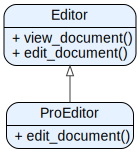


--- Діаграма для Завдання 3: Множинне успадкування ---


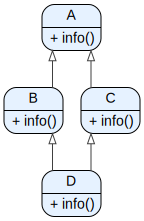


--- Діаграма для Завдання 7: Транспортні засоби ---


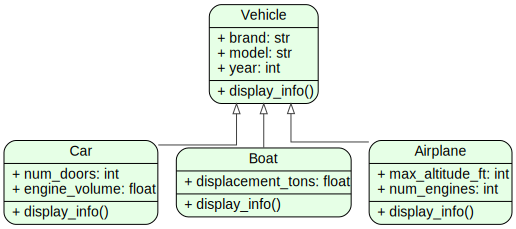

In [21]:
import graphviz

def create_styled_diagram(dot_code, filename):
    """Створює та відображає стилізовану діаграму."""
    graph = graphviz.Source(dot_code)
    # Зберігаємо у файл та одразу відображаємо
    graph.render(filename, format='png', view=False)
    return graph

# --- Спільні стилі для всіх діаграм ---
common_styles = """
    rankdir="BT" // Спадкування знизу вгору
    graph [fontname="Helvetica", fontsize="12", splines="ortho"];
    node [shape="record", style="filled,rounded", fillcolor="#E6F2FF", fontname="Helvetica", penwidth="1.0"];
    edge [arrowhead="empty", color="#404040"];
"""

# ================================================================
# Діаграма 1: Editor/ProEditor
# ================================================================

dot_code_1 = f"""
digraph Task1 {{
    {common_styles}
    Editor [label="{{Editor|+ view_document()\\l+ edit_document()\\l}}"];
    ProEditor [label="{{ProEditor|+ edit_document()\\l}}"];
    ProEditor -> Editor;
}}
"""

print("--- Діаграма для Завдання 1: Editor/ProEditor ---")
display(create_styled_diagram(dot_code_1, "task1_diagram"))


# ================================================================
# Діаграма 2: Множинне успадкування
# ================================================================

dot_code_3 = f"""
digraph Task3 {{
    {common_styles}
    A [label="{{A|+ info()\\l}}"];
    B [label="{{B|+ info()\\l}}"];
    C [label="{{C|+ info()\\l}}"];
    D [label="{{D|+ info()\\l}}"];

    B -> A;
    C -> A;
    D -> B;
    D -> C;
}}
"""
print("\n--- Діаграма для Завдання 3: Множинне успадкування ---")
display(create_styled_diagram(dot_code_3, "task3_diagram"))


# ================================================================
# Діаграма 3: Транспортні засоби
# ================================================================

dot_code_7 = f"""
digraph Task7 {{
    {common_styles}
    node [fillcolor="#E6FFE6"]; // Інший колір для цієї діаграми

    Vehicle [label="{{Vehicle|+ brand: str\\l+ model: str\\l+ year: int\\l|+ display_info()\\l}}"];
    Car [label="{{Car|+ num_doors: int\\l+ engine_volume: float\\l|+ display_info()\\l}}"];
    Boat [label="{{Boat|+ displacement_tons: float\\l|+ display_info()\\l}}"];
    Airplane [label="{{Airplane|+ max_altitude_ft: int\\l+ num_engines: int\\l|+ display_info()\\l}}"];

    Car -> Vehicle;
    Boat -> Vehicle;
    Airplane -> Vehicle;
}}
"""

print("\n--- Діаграма для Завдання 7: Транспортні засоби ---")
display(create_styled_diagram(dot_code_7, "task7_diagram"))